In [78]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [79]:
#Question 2: 

#Stock Prices Paths Simultions 

S0 = 100
K = 100
sigma = 0.3
T = 1
r = 0.03
dt = 1/252 #time steps
N = int(T/dt) #number of time steps 
P = 1000 #number of paths 

######################################

np.random.seed(8) #seeding so that whenever the code is ran, it generates the same Z
Z_stock = np.random.normal(0,1,(N,P))

S = np.zeros((N,P))
S[0] = S0 

for t in range(1,N):
    S[t] = S[t-1] * np.exp((r-0.5*sigma**2)*dt + sigma *np.sqrt(dt)* Z_stock[t])

S_paths = pd.DataFrame(S)
S_paths.to_csv("s_paths.csv",index = False) 


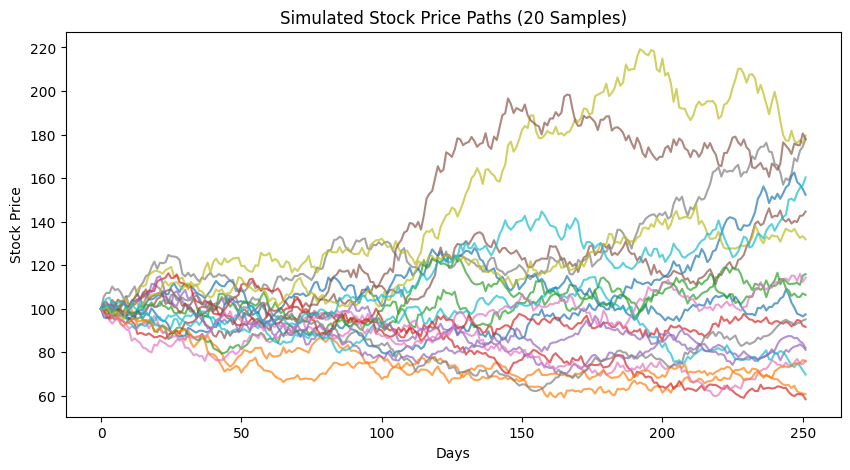

In [80]:
#Plot sample simulated paths 
plt.figure(figsize=(10,5))
plt.plot(S[:,:20],alpha=0.7)
plt.title("Simulated Stock Price Paths (20 Samples)")
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.show()


In [81]:
#(a) Standard Option: 
#Compute the values of a call option 
S_T = S[-1]
C_payoff = np.maximum(S_T-K,0)
C_price = np.exp(-r*T)*np.mean(C_payoff)
print(f"European call option price is: {C_price:.4f}")

European call option price is: 12.8262


In [82]:
#(b) Option with sweetner: 
#Assume that the call has a "sweetner": 
#if the stock return after six months is negative (i.e., the stock price six months fro now is lower than today)
#the final strike price of the option is 90 instead of 100.

#Compute the value of the call with the sweetner.

S_6m = S[int(252/2), :]
K_sweet = np.where(S_6m < S0, 90, 100)

Cs_payoff = np.maximum(S_T-K_sweet,0)
Cs_price = np.exp(-r*T)*np.mean(Cs_payoff)
print(f"European call option with a sweetner is: {Cs_price:.4f}")

#Is it different from the price of a standard call? why?

#Since the modified call option offers additional benefits (lower strike price when the stock price falls), it provides more value to the holder. 
#As a result, the market price of this option will be higher than that of a standard call with the same parameters.
#The sweetener improves the expected value of the option because:
#If the stock price is above 100 at expiration, the option behaves like a standard call.
#If the stock price initially drops but later recovers to, say, 95, the option with the sweetener will be in the money (ITM) at expiration (strike = 90), while the regular call remains out of the money (OTM, strike = 100).
#This asymmetric adjustment in favor of the holder increases the expected payoff, making the option more valuable.

European call option with a sweetner is: 14.5533


In [83]:
#(c) Asian option:
#Assume the final payoff of the option is max(S_ave-K,0)
#payoff depends on the entire path of the stock price

# Compute the value of the Asian call option.

S_ave = np.mean(S, axis=0)
Ca_payoff = np.maximum(S_ave-K,0)
Ca_price = np.exp(-r*T)*np.mean(Ca_payoff)
print(f"Asian European option call price is {Ca_price:.4f}")

#Is it higher or lower than the value of the standard call option? Why? 

#The Asian call option is typically worth less than a standard call because averaging 
#reduces volatility and the likelihood of extreme positive payoffs. 
#It smooths price fluctuations, making it less expensive than a standard call that directly depends on the final stock price.

Asian European option call price is 7.1417


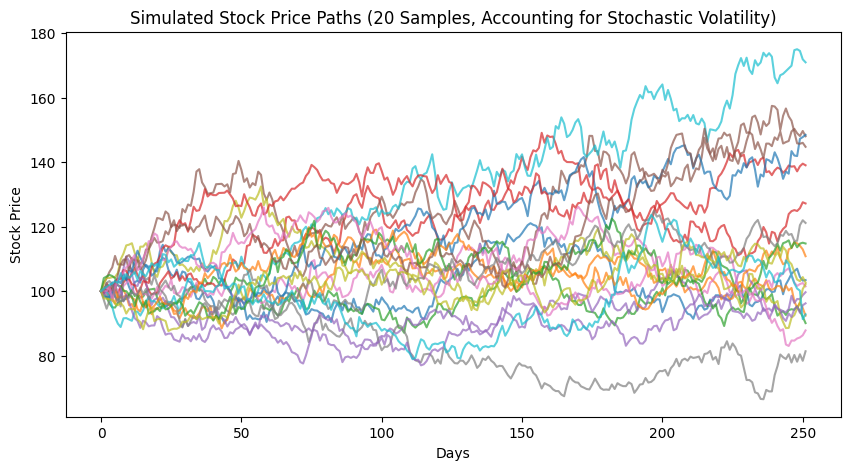

In [84]:
#(d) Standard Option, stochastic volatility: 
#Instead of assuming that the stock price follows a GMB
#we assume that the stock price has stochastic volatility 
#Assume that the stock's BM and the volatility's BM are independent 
 
sigma_0 = 0.3
sigma_ave = 0.3
kappa = 2
gamma = 0.1
mu = 0.03
r = 0.03
T= 1
dt = 1/252 #time steps
N = int(T/dt) #number of time steps 
P = 1000 #number of paths 

#Vol paths simulations 
np.random.seed(8) #seeding so that whenever the code is ran, it generates the same Z
Z_sigma = np.random.normal(0,1,(N,P))
sigma_sto = np.zeros((N,P))
sigma_sto[0] = sigma_0

for t in range (1,N):
    sigma_sto[t] = np.sqrt(np.maximum(0,sigma_sto[t-1]**2 + kappa * (sigma_ave**2 - sigma_sto[t-1]**2) * dt + gamma * sigma_sto[t-1] * np.sqrt(dt) * Z_sigma[t]))

#Stock price paths simulations using stochastic volatility
Z_stock = np.random.normal(0,1,(N,P)) #no re-seeding so that Z_sigma and Z_stock are independet 
S_StoVol = np.zeros((N,P))
S_StoVol[0] = S0 
for t in range (1,N):
    S_StoVol[t] = S_StoVol[t-1]* np.exp((mu-0.5*sigma_sto[t]**2)*dt + sigma_sto[t]*np.sqrt(dt)*Z_stock[t])
S_StoVol_paths = pd.DataFrame(S_StoVol)
S_StoVol_paths.to_csv("Stock_StoVol_paths.csv", index = False)

#Plot sample simulated paths 
plt.figure(figsize=(10,5))
plt.plot(S_StoVol[:,:20],alpha=0.7)
plt.title("Simulated Stock Price Paths (20 Samples, Accounting for Stochastic Volatility)")
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.show()

In [88]:
#(d) Standard Option, stochastic volatility: 
##Calculate the price of call options with K 100, 150, 900, T=1

K1 = 100
K2 = 150
K3 = 900
T=1
r=0.03

#With Heston model
S_StoVol_T = S_StoVol[-1]

Ch_payoff_100 = np.maximum(0,S_StoVol_T-K1)
Ch_price_100 = np.exp(-r*T)*np.mean(Ch_payoff_100)

Ch_payoff_150 = np.maximum(0,S_StoVol_T-K2)
Ch_price_150 = np.exp(-r*T)*np.mean(Ch_payoff_150)

Ch_payoff_900 = np.maximum(0,S_StoVol_T-K3)
Ch_price_900 = np.exp(-r*T)*np.mean(Ch_payoff_900)

#With BS model
S_T = S[-1]

Cbs_payoff_100 = np.maximum(S_T-K1,0)
Cbs_price_100 = np.exp(-r*T)*np.mean(Cbs_payoff_100)

Cbs_payoff_150 = np.maximum(S_T-K2,0)
Cbs_price_150 = np.exp(-r*T)*np.mean(Cbs_payoff_150)

Cbs_payoff_900 = np.maximum(S_T-K3,0)
Cbs_price_900 = np.exp(-r*T)*np.mean(Cbs_payoff_900)

#Results:

print(f"The prices of European call options under the Heston model are: "
      f"{Ch_price_100:.4f} with K=100 ,"
      f"{Ch_price_150:.4f} with K=150,"
      f"{Ch_price_900:.4f} with K=900.")

print(f"The prices of European call options under the Black-Scholes model are: "
      f"{Cbs_price_100:.4f} with K=100 ,"
      f"{Cbs_price_150:.4f} with K=150,"
      f"{Cbs_price_900:.4f} with K=900.")

The prices of European call options under the Heston model are: 13.5074 with K=100 ,1.6202 with K=150,0.0000 with K=900.
The prices of European call options under the Black-Scholes model are: 12.8262 with K=100 ,1.5247 with K=150,0.0000 with K=900.


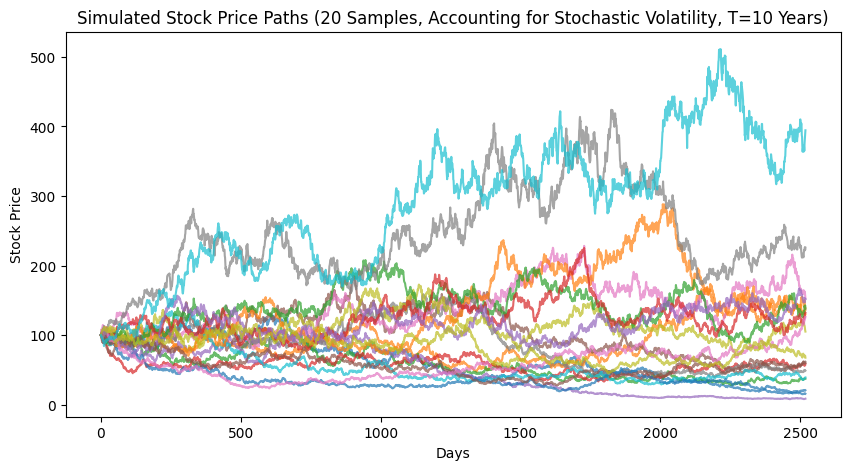

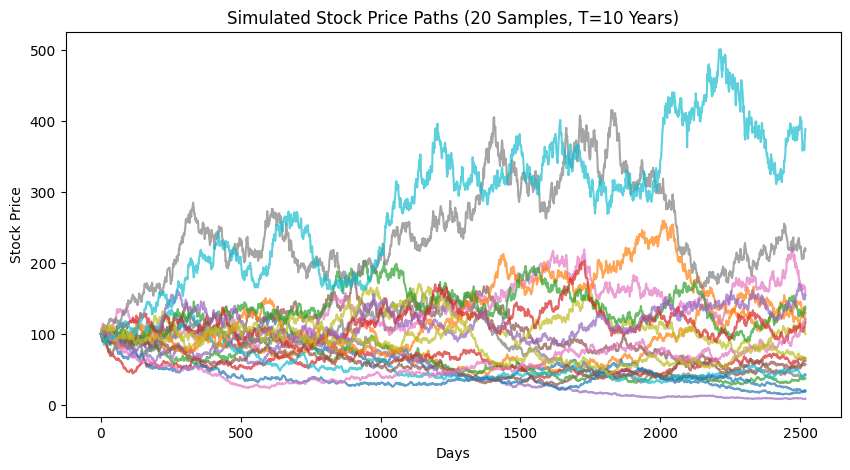

In [90]:
#(e) Standard Option, stochastic volatility: Increase the maturity of the option to 10 years 

############################################################################################
#Let's re-do our vol and stock price paths for T=10years as opposed to T=1 year: 
sigma = 0.3
sigma_0 = 0.3
sigma_ave = 0.3
kappa = 2
gamma = 0.1
mu = 0.03
r = 0.03
T_10 = 10
dt = 1/252 #time steps
N_10 = int(T_10/dt) #number of time steps 
P = 1000 #number of paths 

np.random.seed(8) #seeding so that whenever the code is ran, it generates the same Z
Z_sigma_10 = np.random.normal(0,1,(N_10,P))
sigma_sto_10 = np.zeros((N_10,P))
sigma_sto_10[0] = sigma_0

for t in range (1,N_10):
    sigma_sto_10[t] = np.sqrt(np.maximum(0,sigma_sto_10[t-1]**2 + kappa * (sigma_ave**2 - sigma_sto_10[t-1]**2) * dt + gamma * sigma_sto_10[t-1] * np.sqrt(dt) * Z_sigma_10[t]))

#Stock price paths simulations using stochastic volatility
S0 = 100
Z_stock_10 = np.random.normal(0,1,(N_10,P)) #no re-seeding so that Z_sigma and Z_stock are independet 
S_StoVol_10 = np.zeros((N_10,P))
S_StoVol_10[0] = S0 
for t in range (1,N_10):
    S_StoVol_10[t] = S_StoVol_10[t-1]* np.exp((mu-0.5*sigma_sto_10[t]**2)*dt + sigma_sto_10[t]*np.sqrt(dt)*Z_stock_10[t])
S_StoVol_10_paths = pd.DataFrame(S_StoVol_10)
S_StoVol_10_paths.to_csv("Stock_StoVol_10_paths.csv", index = False)

#Stock price paths simulations without stochastic volatility
S_10 = np.zeros((N_10,P))
S_10[0] = S0 

for t in range(1,N_10):
    S_10[t] = S_10[t-1] * np.exp((r-0.5*sigma**2)*dt + sigma *np.sqrt(dt)* Z_stock_10[t])

S_10_paths = pd.DataFrame(S_10)
S_10_paths.to_csv("s_10_paths.csv",index = False) 
##############################################################################################
#Plot sample simulated paths 

#with stochastic vol
plt.figure(figsize=(10,5))
plt.plot(S_StoVol_10[:,:20],alpha=0.7)
plt.title("Simulated Stock Price Paths (20 Samples, Accounting for Stochastic Volatility, T=10 Years)")
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.show()

#without stochastic vol
plt.figure(figsize=(10,5))
plt.plot(S_10[:,:20],alpha=0.7)
plt.title("Simulated Stock Price Paths (20 Samples, T=10 Years)")
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.show()

#I was expecting the simulations using stochastic volatility would look a bit different than the ones without stochastic vol
#But I think the mean reverting level sigma_ave=0.3 which is close to the initial vol of sigma=0.3, and with T=10 years, 
#then the volatility stochastic process may not fluctuate much making stock prices behave similarly to when we son't account for stochastic vol

In [91]:
#(e) Standard Option, stochastic volatility:
#calculate the prices of call options with K 100, 150, and 900 for both Heston and B-S model 
#Are price differences in the two models bigger or smaller than when the option maturity is one year? 

#With Heston model
S_StoVol_10_T = S_StoVol_10[-1]

Ch10_payoff_100 = np.maximum(0,S_StoVol_10_T-K1)
Ch10_price_100 = np.exp(-r*T)*np.mean(Ch10_payoff_100)

Ch10_payoff_150 = np.maximum(0,S_StoVol_10_T-K2)
Ch10_price_150 = np.exp(-r*T)*np.mean(Ch10_payoff_150)

Ch10_payoff_900 = np.maximum(0,S_StoVol_10_T-K3)
Ch10_price_900 = np.exp(-r*T)*np.mean(Ch10_payoff_900)

#With BS model
S_10_T = S_10[-1]

Cbs10_payoff_100 = np.maximum(S_10_T-K1,0)
Cbs10_price_100 = np.exp(-r*T)*np.mean(Cbs10_payoff_100)

Cbs10_payoff_150 = np.maximum(S_10_T-K2,0)
Cbs10_price_150 = np.exp(-r*T)*np.mean(Cbs10_payoff_150)

Cbs10_payoff_900 = np.maximum(S_10_T-K3,0)
Cbs10_price_900 = np.exp(-r*T)*np.mean(Cbs10_payoff_900)

#Results:

print(f"With a maturity of 10 years, the prices of European call options under the Heston Model are: "
      f"{Ch10_price_100:.4f} with K=100 ,"
      f"{Ch10_price_150:.4f} with K=150,"
      f"{Ch10_price_900:.4f} with K=900.")

print(f"With a maturity of 10 years, the prices of European call options under the Black-Scholes Model are: "
      f"{Cbs10_price_100:.4f} with K=100 ,"
      f"{Cbs10_price_150:.4f} with K=150,"
      f"{Cbs10_price_900:.4f} with K=900.")

With a maturity of 10 years, the prices of European call options under the Heston Model are: 58.1257 with K=100 ,42.5046 with K=150,1.9900 with K=900.
With a maturity of 10 years, the prices of European call options under the Black-Scholes Model are: 58.4478 with K=100 ,42.8434 with K=150,2.0433 with K=900.


In [ ]:
#Summary comments for both (e) and (d):

##Heston and Black-Scholes model prices are close but not identical:
#This suggests that the stochastic volatility process has a moderate effect on long-term options.
#With a 10-year maturity, the difference is small compared to shorter maturities.

##Heston Model Prices Are Slightly Lower:
#This is expected because the Heston model accounts for changing volatility, which leads to higher implied volatility in low-vol periods.
#The Black-Scholes model assumes constant volatility, possibly overpricing options when compared to a stochastic model.

##Differences are Smaller at High Strike Prices:
#Both models assign near-zero prices to the deep out-of-the-money option (K=900).
#This makes sense: since S_T is unlikely to reach 900, so the option is essentially worthless in both models.